<a href="https://colab.research.google.com/github/mohamed0998/time-series-analysis/blob/master/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import the packages

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()
from google.colab import files

uploaded = files.upload()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving Index2018.csv to Index2018.csv


## load the data

In [3]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')


## Removing Surplus Data

In [4]:
df_comp['market_value']=df_comp.spx

In [5]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## white noise`

In [9]:
wn = np.random.normal(loc=df.market_value.mean(),scale=df.market_value.std(), size=len(df))
df['wn']=wn
df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1089.194836
std,292.559287,290.349619
min,438.920000,58.208390
25%,914.620000,896.156717
50%,1144.650000,1095.588019
75%,1316.280729,1278.829234
max,1570.252238,2117.714215


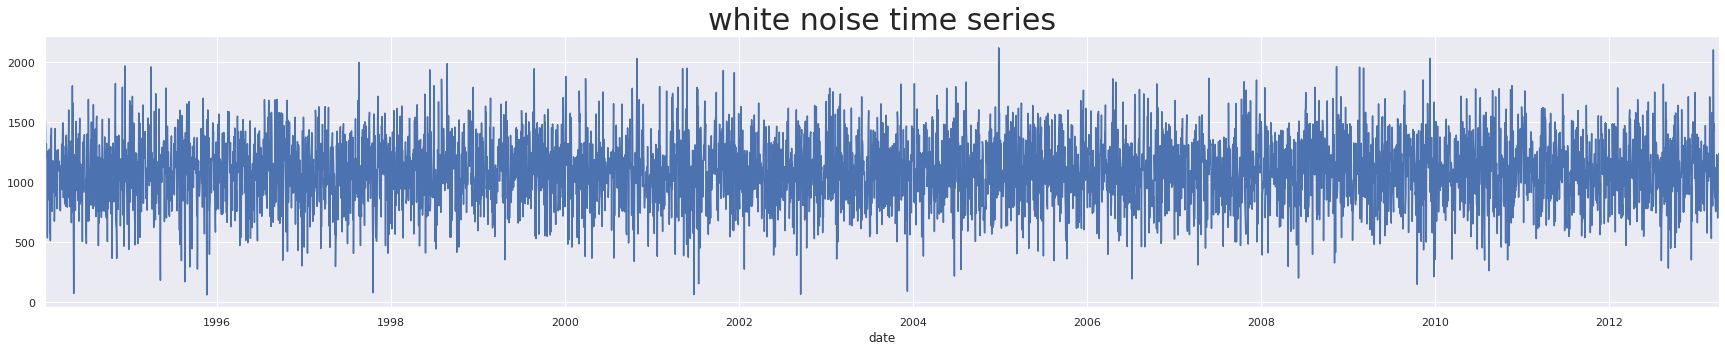

In [11]:
df.wn.plot(figsize=(30,5))
plt.title('white noise time series', size=30)
plt.show()



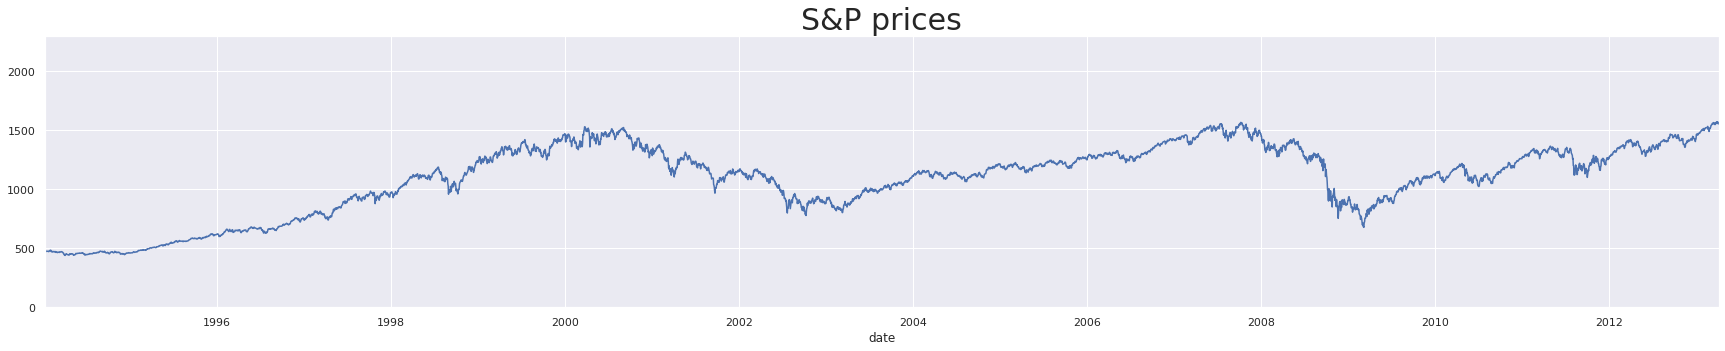

In [16]:
df.market_value.plot(figsize=(30,5))
plt.title("S&P prices",size=30)
plt.ylim(0,2300)
plt.show()


## Random Walk

In [17]:
uploaded = files.upload()

Saving RandWalk.csv to RandWalk.csv


In [25]:
rw=pd.read_csv('RandWalk.csv')
rw.date=pd.to_datetime(rw.date, dayfirst= True)
rw.set_index('date', inplace=True)
rw=rw.asfreq('b')
rw.head()
rw.describe()


,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [26]:
df['rw'] = rw.price
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,market_value,wn,rw
date,,,
1994-01-07,469.90,1272.533186,1122.139662
1994-01-10,475.27,969.464868,1080.347860
1994-01-11,474.13,1507.205825,1082.095245
1994-01-12,474.17,1331.441084,1083.639265
1994-01-13,472.47,1274.959966,1067.146255


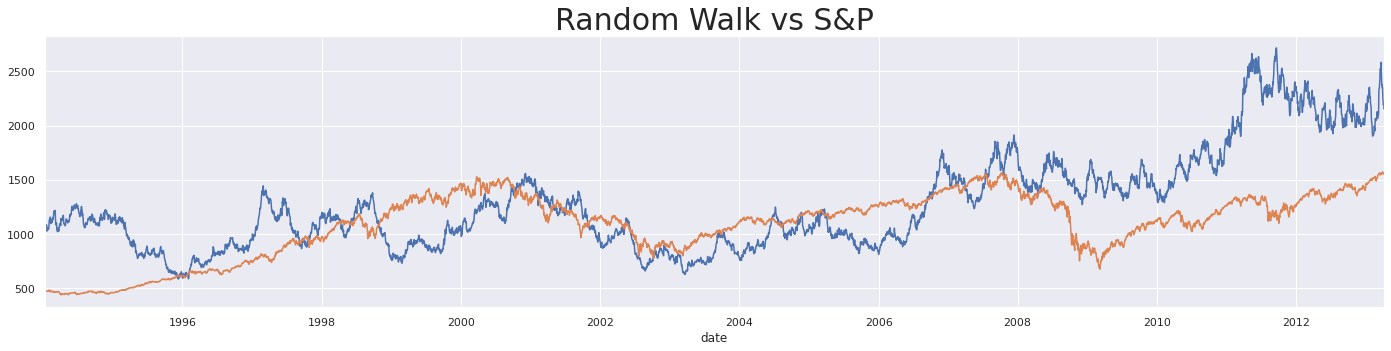

In [31]:
df.rw.plot(figsize=(24,5))
df.market_value.plot()
plt.title("Random Walk vs S&P",size=30)
plt.show()